In [68]:
import pandas as pd
import matplotlib.pyplot as plt
#3.10.7

Here I loaded in my data file having to accout for some latin characters

In [69]:
full_file = pd.read_csv("albumlist.csv", encoding='latin-1',)
#print(full_file.to_string(index=False))
full_file.head()


,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock


Here, I listed out the categories we are working with, which is a pretty lean 6, but still a lot of data and fun stats we can work within that.

In [70]:
full_file.columns

Index(['Number', 'Year', 'Album', 'Artist', 'Genre', 'Subgenre'], dtype='object')

Here I dropped the Subgenre category as it would seem pretty repetive with the Genre category. This category would also make my data confusing.

In [71]:
filtered_file = full_file.drop(columns=["Subgenre"])
filtered_file.head()

,Number,Year,Album,Artist,Genre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock
1,2,1966,Pet Sounds,The Beach Boys,Rock
2,3,1966,Revolver,The Beatles,Rock
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop"


Just establishing how many albums are in my list before we start breaking down the information

In [72]:
print(len(filtered_file))


500


Onto the fun stuff. I listed the top performing artist on the list. These artists had the most albums. 

In [73]:
top_artist = filtered_file.groupby('Artist')['Number'].count().nlargest(10)
top_artist.head(10)



Artist
Bob Dylan             10
The Beatles           10
The Rolling Stones    10
Bruce Springsteen      8
The Who                7
David Bowie            5
Elton John             5
Led Zeppelin           5
Radiohead              5
U2                     5
Name: Number, dtype: int64

Used Data to show the 6 years that only had 1 top album. Most years selected they had multiple albums that year. This shows that the selectors of this list mostly thought that some years were just a great year for music.

In [74]:
bad_genre = filtered_file.groupby('Year')['Number'].count().nsmallest(6)
bad_genre.head(10)

Year
1955    1
1958    1
1961    1
2008    1
2010    1
2011    1
Name: Number, dtype: int64

This was a bit rough. Even though subgenre category did exist for some reason there were multiple and uneven amounts of genres listed for each album. I simply took the first genre listed for each album and cleared the rest. Luckily, they put a comma after each album which meant I could just clear everything in "Genre" after the first comma. 

In [75]:
split_genre = []
for s in  filtered_file["Genre"]:
    split_genre.append(s.split(",")[0]) 
filtered_file["Genre"] = split_genre   
filtered_file.head(20)

,Number,Year,Album,Artist,Genre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock
1,2,1966,Pet Sounds,The Beach Boys,Rock
2,3,1966,Revolver,The Beatles,Rock
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock
4,5,1965,Rubber Soul,The Beatles,Rock
5,6,1971,What's Going On,Marvin Gaye,Funk / Soul
6,7,1972,Exile on Main St.,The Rolling Stones,Rock
7,8,1979,London Calling,The Clash,Rock
8,9,1966,Blonde on Blonde,Bob Dylan,Rock
9,10,1968,"The Beatles (""The White Album"")",The Beatles,Rock


This bar graph show the most popular decade for top albums. The hardest thing was creating the "decade_genre_counts" function. I basically had to roud each year in the data set to the nearest 10. the rest is just grabbing the categories I want. Lastly customizing the colors so they are distinct and readable. 

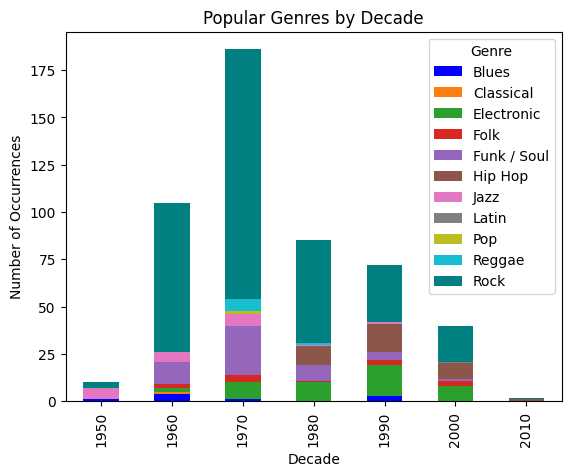

In [76]:
decade_genre_counts = filtered_file.groupby([filtered_file['Year'] // 10 * 10, 'Genre']).size().reset_index(name='Counts')
decade_genre_counts_pivot = decade_genre_counts.pivot(index='Year', columns='Genre', values='Counts')


colors = ['#0000FF', '#ff7f0e', '#2ca02c', '#d62722', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#008080']



ax = decade_genre_counts_pivot.plot(kind='bar', stacked=True, color=colors)

plt.title('Popular Genres by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Occurrences')

plt.show()

This is a pie chart that gives you an idea of how many artists had multiple albums on the list. It grabs a sample of 10 from my list and spits out the percentage of albums they have. Almost every time at least one artist has way more albums than the rest. 

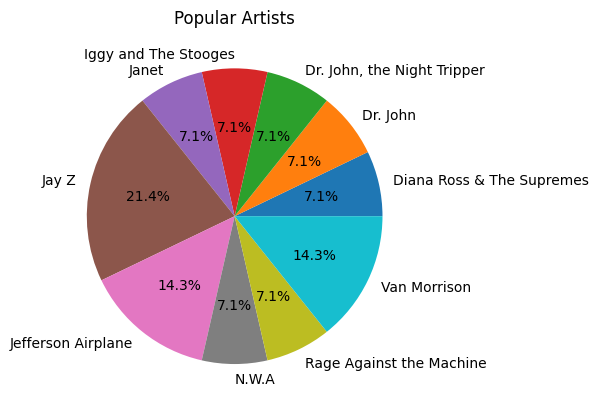

In [97]:
artist_counts = filtered_file.groupby('Artist').size().reset_index(name='counts')
top_artists = artist_counts.sample(10)['Artist'].tolist()
top_artist_counts = artist_counts[artist_counts['Artist'].isin(top_artists)]
plt.pie(top_artist_counts['counts'], labels=top_artist_counts['Artist'], autopct='%1.1f%%')
plt.title('Popular Artists')
plt.show()


After breaking down this data we can walk away with a lot of fun insights. First of all there were certain decades that who was in ever in charged of this list favored. Seemingly having a year in recorded history to play with they seemed to favor some year. Not only that some artist were heavily favored and take up huge chunks of this list. Like The Beatles and The Rollins tones. The last interesting bit from this project really comes as no surprise as this is Rolling Stone Magazine. But the Genre of Rock Dominated this list. Looking at my bar graph every other genre gets crushed by rock in every single decade in the list. So inconclusive the data show's that this "Greatest" list is actually very opinionated and subjected as all music is.